In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

In [4]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/20
391/391 [==============================] - 131s 332ms/step - loss: 1.4909 - accuracy: 0.4865 - val_loss: 1.9677 - val_accuracy: 0.3311
Epoch 2/20
391/391 [==============================] - 131s 335ms/step - loss: 1.0569 - accuracy: 0.6312 - val_loss: 1.1667 - val_accuracy: 0.5907
Epoch 3/20
391/391 [==============================] - 134s 342ms/step - loss: 0.8882 - accuracy: 0.6917 - val_loss: 0.9997 - val_accuracy: 0.6527
Epoch 4/20
391/391 [==============================] - 136s 347ms/step - loss: 0.7729 - accuracy: 0.7329 - val_loss: 1.0797 - val_accuracy: 0.6203
Epoch 5/20
391/391 [==============================] - 134s 342ms/step - loss: 0.6832 - accuracy: 0.7680 - val_loss: 0.9956 - val_accuracy: 0.6629
Epoch 6/20
391/391 [==============================] - 134s 342ms/step - loss: 0.6050 - accuracy: 0.7950 - val_loss: 0.9031 - val_accuracy: 0.6871
Epoch 7/20
391/391 [==============================] - 147s 375ms/step - loss: 0.5360 - accuracy: 0.8228 - val_loss: 1.0250 -

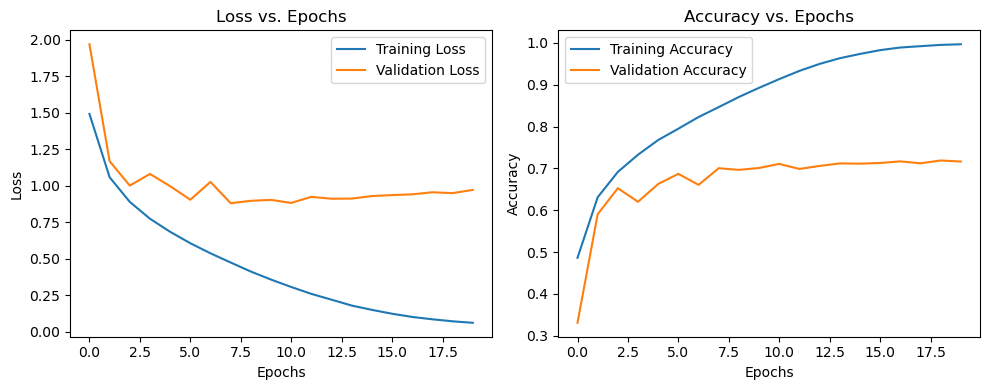

In [5]:
# Plot the loss and accuracy curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.savefig("Loss and Accuracy vs Epochs.png")
plt.show()

In [6]:
import json
import pandas as pd
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [7]:
print(history.history)

{'loss': [1.4909223318099976, 1.0568898916244507, 0.8881698250770569, 0.7729122638702393, 0.6832149028778076, 0.6050249934196472, 0.5359764695167542, 0.472902774810791, 0.4110872745513916, 0.35605186223983765, 0.30536460876464844, 0.2581913471221924, 0.21837152540683746, 0.17819029092788696, 0.148660346865654, 0.12210460007190704, 0.10014121234416962, 0.08406392484903336, 0.07026904076337814, 0.06011282652616501], 'accuracy': [0.4864799976348877, 0.6311600208282471, 0.6917200088500977, 0.7328600287437439, 0.7679799795150757, 0.7950199842453003, 0.8228399753570557, 0.8465999960899353, 0.8707600235939026, 0.8926799893379211, 0.9135000109672546, 0.933139979839325, 0.9498599767684937, 0.963379979133606, 0.9736400246620178, 0.9827200174331665, 0.9890000224113464, 0.992139995098114, 0.9952600002288818, 0.9967600107192993], 'val_loss': [1.9677175283432007, 1.1667180061340332, 0.999664843082428, 1.0796977281570435, 0.9956319332122803, 0.9030700325965881, 1.0250037908554077, 0.8792274594306946,